In [9]:
import numpy as np

a = np.array([1,2,3,4,5,6,7])
a = np.clip(a, 3, 5)
a

array([3, 3, 3, 4, 5, 5, 5])

In [10]:
import numpy as np
x=np.array([10,11,12,13,14,15,16,17,18,19])
# print(len(x))

# for i in range(len(x)):
#     print(x[i], end=" ")
    
# print()
indexes = np.random.permutation(len(x))
# print(indexes)
for i in indexes:
    print(x[i], end=" ")

16 18 12 14 10 13 11 15 19 17 

In [11]:
# temp = np.array([1,2,3,4])
# mean = np.mean(temp)
# print(mean)
# print(temp.shape)
# mean = np.mean(temp, axis=0)
# print(mean)


temp = np.array([[1,2],
                 [3,4]])
mean = np.mean(temp)
print(mean)
print(temp.shape)
mean = np.mean(temp, axis=1)
print(mean)
print(mean.ndim)
mean = np.mean(temp, axis=0)
print(mean)
print(mean.ndim)

2.5
(2, 2)
[1.5 3.5]
1
[2. 3.]
1


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
x = cancer.data
y = cancer.target
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, 
                                                    test_size=0.2, random_state=42)
'''
train_mean = np.mean(x_train, axis=0)  # 행렬의 열평균
train_std = np.std(x_train, axis=0) # 행렬의 열 표준편차
x_train_scaled = (x_train - train_mean) / train_std
print(x_train_scaled)
'''

class SingleLayer:
    
    def __init__(self):
        self.w = None
        self.b = None
        self.losses = []

    def forpass(self, x):
        z = np.sum(x * self.w) + self.b  # 직선 방정식을 계산합니다
        return z

    def backprop(self, x, err):
        w_grad = x * err    # 가중치에 대한 그래디언트를 계산합니다
        b_grad = 1 * err    # 절편에 대한 그래디언트를 계산합니다
        return w_grad, b_grad

    def activation(self, z):
        z = np.clip(z, -100, None) # 안전한 np.exp() 계산을 위해
        a = 1 / (1 + np.exp(-z))  # 시그모이드 계산
        return a
        
    def fit(self, x, y, epochs=100, rate=0.01):
        self.w = np.ones(x.shape[1])               # 가중치를 초기화합니다.
        self.b = 0                                 # 절편을 초기화합니다.
        for i in range(epochs):                    # epochs만큼 반복합니다
            loss = 0
            # 인덱스를 섞습니다
            indexes = np.random.permutation(len(x))

#             indexes = np.arange(len(x))
            for i in indexes:                      # 모든 샘플에 대해 반복합니다
                z = self.forpass(x[i])             # 정방향 계산
                a = self.activation(z)             # 활성화 함수 적용
                err = a - y[i]                  # 오차 계산
                w_grad, b_grad = self.backprop(x[i], err) # 역방향 계산
                self.w -= rate*w_grad                   # 가중치 업데이트
                self.b -= rate*b_grad                   # 절편 업데이트
                # 안전한 로그 계산을 위해 클리핑한 후 손실을 누적합니다
                a = np.clip(a, 1e-10, 1-1e-10)
                loss += -(y[i]*np.log(a)+(1-y[i])*np.log(1-a))
            # 에포크마다 평균 손실을 저장합니다
            self.losses.append(loss/len(y))
    
    def predict(self, x):
        z = [self.forpass(x_i) for x_i in x]     # 정방향 계산
        return np.array(z) > 0                   # 스텝 함수 적용
    
    def score(self, x, y):
        return np.mean(self.predict(x) == y)

layer = SingleLayer()
layer.fit(x_train, y_train, epochs=100)
layer.score(x_test, y_test)

0.7192982456140351

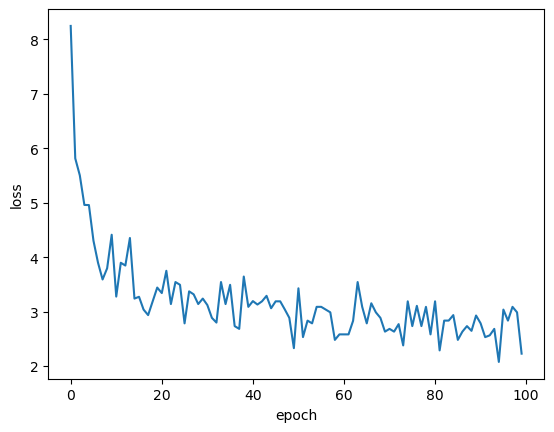

In [13]:
plt.plot(layer.losses)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [14]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
x = cancer.data
print(len(x))
y = cancer.target
x_train_all, x_test, y_train_all, y_test = train_test_split(x, y, stratify=y, 
                                                            test_size=0.2, random_state=42)
print(len(x_train_all), len(x_test))
x_train, x_val, y_train, y_val = train_test_split(x_train_all, y_train_all, stratify=y_train_all, 
                                                  test_size=0.2, random_state=42)
print(len(x_train), len(x_val))

569
455 114
364 91


['mean perimeter' 'mean area']


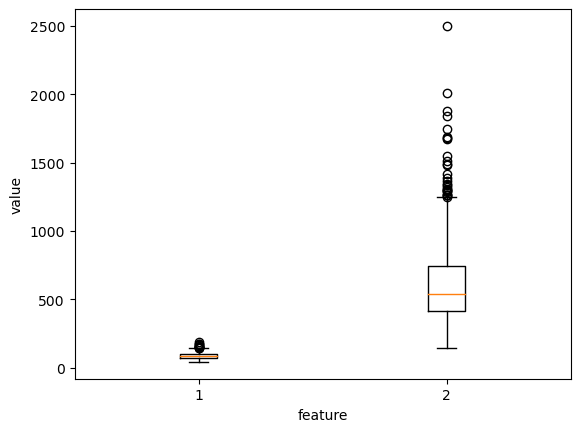

In [15]:
print(cancer.feature_names[[2,3]])
plt.boxplot(x_train[:, 2:4])
plt.xlabel('feature')
plt.ylabel('value')
plt.show()

In [16]:
class SingleLayer:
    
    def __init__(self, learning_rate=0.1, l1=0, l2=0):
        self.w = None
        self.b = None
        self.losses = []
        self.val_losses = []
        self.w_history = []
        self.lr = learning_rate
        self.l1 = l1
        self.l2 = l2

    def forpass(self, x):
        z = np.sum(x * self.w) + self.b    # 직선 방정식을 계산합니다
        return z

    def backprop(self, x, err):
        w_grad = x * err          # 가중치에 대한 그래디언트를 계산합니다
        b_grad = 1 * err    # 절편에 대한 그래디언트를 계산합니다
        return w_grad, b_grad

    def activation(self, z):
        z = np.clip(z, -100, None) # 안전한 np.exp() 계산을 위해
        a = 1 / (1 + np.exp(-z))  # 시그모이드 계산
        return a
        
    def fit(self, x, y, epochs=100, x_val=None, y_val=None):
        self.w = np.ones(x.shape[1])               # 가중치를 초기화합니다.
        self.b = 0                                 # 절편을 초기화합니다.
        self.w_history.append(self.w.copy())       # 가중치를 기록합니다.
        np.random.seed(42)                         # 랜덤 시드를 지정합니다.
        for i in range(epochs):                    # epochs만큼 반복합니다.
            loss = 0
            # 인덱스를 섞습니다
            indexes = np.random.permutation(np.arange(len(x)))
            for i in indexes:                      # 모든 샘플에 대해 반복합니다
                z = self.forpass(x[i])             # 정방향 계산
                a = self.activation(z)             # 활성화 함수 적용
                err = (a - y[i])                  # 오차 계산
                w_grad, b_grad = self.backprop(x[i], err) # 역방향 계산
                # 그래디언트에서 페널티 항의 미분 값을 더합니다
                w_grad += self.l1 * np.sign(self.w) + self.l2 * self.w
                self.w -= self.lr * w_grad         # 가중치 업데이트
                self.b -= b_grad                   # 절편 업데이트
                # 가중치를 기록합니다.
                self.w_history.append(self.w.copy())
                # 안전한 로그 계산을 위해 클리핑한 후 손실을 누적합니다
                a = np.clip(a, 1e-10, 1-1e-10)
                loss += -(y[i]*np.log(a)+(1-y[i])*np.log(1-a))
            # 에포크마다 평균 손실을 저장합니다
            self.losses.append(loss/len(y) + self.reg_loss())
            # 검증 세트에 대한 손실을 계산합니다
            self.update_val_loss(x_val, y_val)
    
    def predict(self, x):
        z = [self.forpass(x_i) for x_i in x]     # 정방향 계산
        return np.array(z) >= 0                   # 스텝 함수 적용
    
    def score(self, x, y):
        return np.mean(self.predict(x) == y)
    
    def reg_loss(self):
        return self.l1 * np.sum(np.abs(self.w)) + self.l2 / 2 * np.sum(self.w**2)
    
    def update_val_loss(self, x_val, y_val):
        if x_val is None:
            return
        val_loss = 0
        for i in range(len(x_val)):
            z = self.forpass(x_val[i])     # 정방향 계산
            a = self.activation(z)         # 활성화 함수 적용
            a = np.clip(a, 1e-10, 1-1e-10)
            val_loss += -(y_val[i]*np.log(a)+(1-y_val[i])*np.log(1-a))
        self.val_losses.append(val_loss/len(y_val) + self.reg_loss())

In [17]:
layer1 = SingleLayer()
layer1.fit(x_train, y_train)
layer1.score(x_val, y_val)

0.9120879120879121

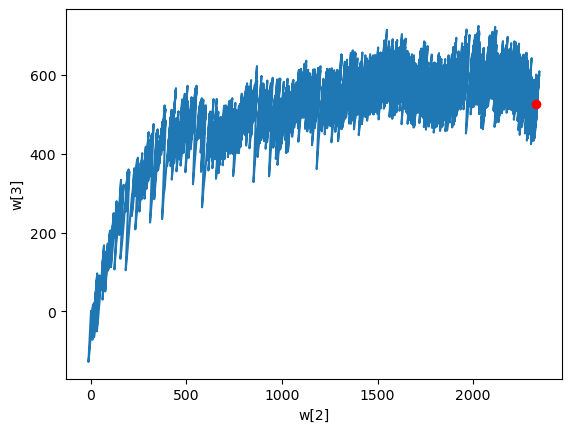

In [18]:
w2 = []
w3 = []
for w in layer1.w_history:
    w2.append(w[2])
    w3.append(w[3])
plt.plot(w2, w3)
plt.plot(w2[-1], w3[-1], 'ro')
plt.xlabel('w[2]')
plt.ylabel('w[3]')
plt.show()

### 스케일링

In [19]:
a = np.array([[1,2,3],
              [4,5,6]])

print(np.sum(a))
print(np.sum(a,axis=0))
print(np.sum(a,axis=1))
print(np.mean(a,axis=0))

21
[5 7 9]
[ 6 15]
[2.5 3.5 4.5]


In [20]:
a = np.array([10,4,6,2,1,4,5,7,8,9])
print(a.shape)
a = a*1000
a_mean = np.mean(a, axis=0)
print(a_mean)
a_std = np.std(a, axis=0)
print(a_std)
a_scaled = (a - a_mean)/a_std
print(a_scaled)
print(np.mean(a_scaled, axis=0))
print(np.std(a_scaled, axis=0))

(10,)
5600.0
2800.0
[ 1.57142857 -0.57142857  0.14285714 -1.28571429 -1.64285714 -0.57142857
 -0.21428571  0.5         0.85714286  1.21428571]
-6.661338147750939e-17
1.0


In [21]:
a = np.array([[10,4,6,2,1,4,5,7,8,9],
              [1000,400,500,200,100,800,300,700,800,900]])
a = a.T
print(a.shape)
print(a)

a_mean = np.mean(a, axis=0)
print(a_mean)
a_std = np.std(a, axis=0)
print(a_std)
a_scaled = (a - a_mean)/a_std
print(a_scaled)
print(np.mean(a_scaled, axis=0))
print(np.std(a_scaled, axis=0))

(10, 2)
[[  10 1000]
 [   4  400]
 [   6  500]
 [   2  200]
 [   1  100]
 [   4  800]
 [   5  300]
 [   7  700]
 [   8  800]
 [   9  900]]
[  5.6 570. ]
[  2.8        296.81644159]
[[ 1.57142857  1.44870681]
 [-0.57142857 -0.57274455]
 [ 0.14285714 -0.23583599]
 [-1.28571429 -1.24656167]
 [-1.64285714 -1.58347023]
 [-0.57142857  0.77488969]
 [-0.21428571 -0.90965311]
 [ 0.5         0.43798113]
 [ 0.85714286  0.77488969]
 [ 1.21428571  1.11179825]]
[1.11022302e-16 2.22044605e-17]
[1. 1.]


In [22]:
train_mean = np.mean(x_train, axis=0)
train_std = np.std(x_train, axis=0)
x_train_scaled = (x_train - train_mean) / train_std

In [23]:
layer2 = SingleLayer()
layer2.fit(x_train_scaled, y_train)

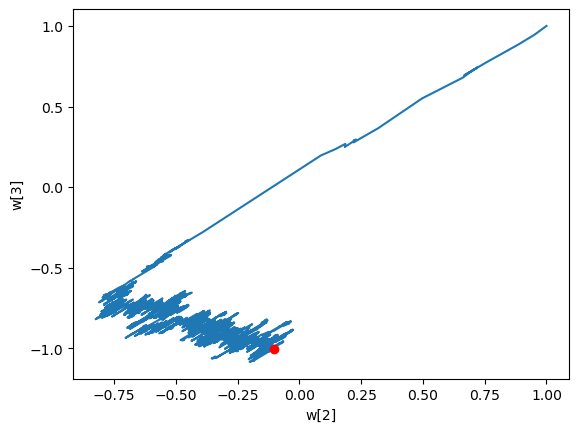

In [24]:
w2 = []
w3 = []
for w in layer2.w_history:
    w2.append(w[2])
    w3.append(w[3])
plt.plot(w2, w3)
plt.plot(w2[-1], w3[-1], 'ro')
plt.xlabel('w[2]')
plt.ylabel('w[3]')
plt.show()

In [25]:
layer2.score(x_val, y_val)

0.37362637362637363

In [26]:
val_mean = np.mean(x_val, axis=0)
val_std = np.std(x_val, axis=0)
x_val_scaled = (x_val - val_mean) / val_std

In [27]:
layer2.score(x_val_scaled, y_val)

0.967032967032967

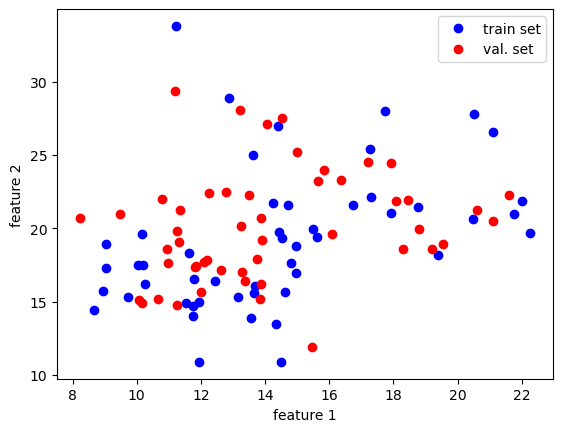

In [28]:
plt.plot(x_train[:50, 0], x_train[:50, 1], 'bo')
plt.plot(x_val[:50, 0], x_val[:50, 1], 'ro')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend(['train set', 'val. set'])
plt.show()

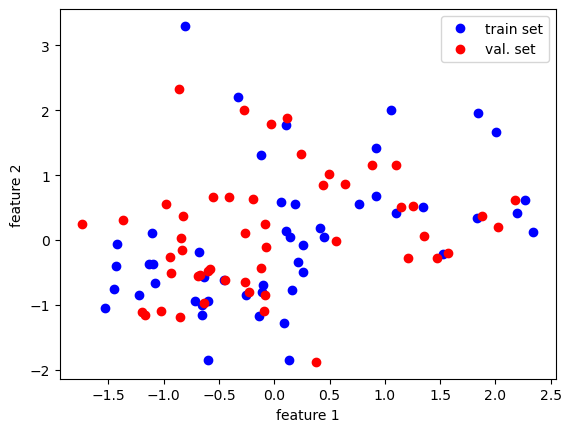

In [29]:
plt.plot(x_train_scaled[:50, 0], x_train_scaled[:50, 1], 'bo')
plt.plot(x_val_scaled[:50, 0], x_val_scaled[:50, 1], 'ro')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend(['train set', 'val. set'])
plt.show()

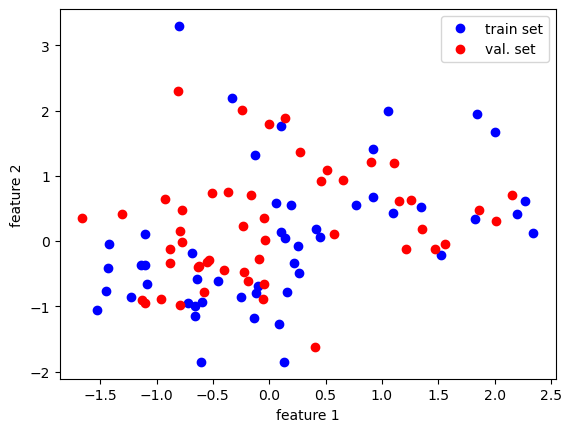

In [30]:
x_val_scaled = (x_val - train_mean) / train_std
plt.plot(x_train_scaled[:50, 0], x_train_scaled[:50, 1], 'bo')
plt.plot(x_val_scaled[:50, 0], x_val_scaled[:50, 1], 'ro')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend(['train set', 'val. set'])
plt.show()

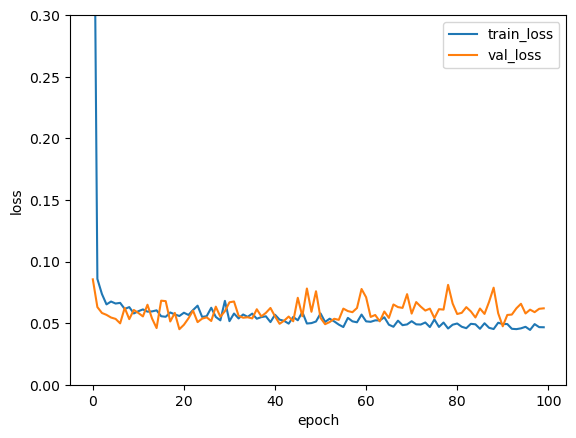

In [31]:
layer3 = SingleLayer()
layer3.fit(x_train_scaled, y_train, x_val=x_val_scaled, y_val=y_val)

plt.ylim(0, 0.3)
plt.plot(layer3.losses)
plt.plot(layer3.val_losses)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'])
plt.show()

In [32]:
layer4 = SingleLayer()
layer4.fit(x_train_scaled, y_train, epochs=50)
layer4.score(x_val_scaled, y_val)

0.967032967032967

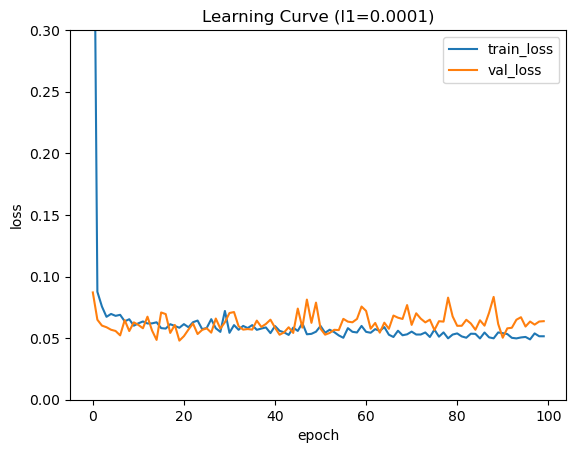

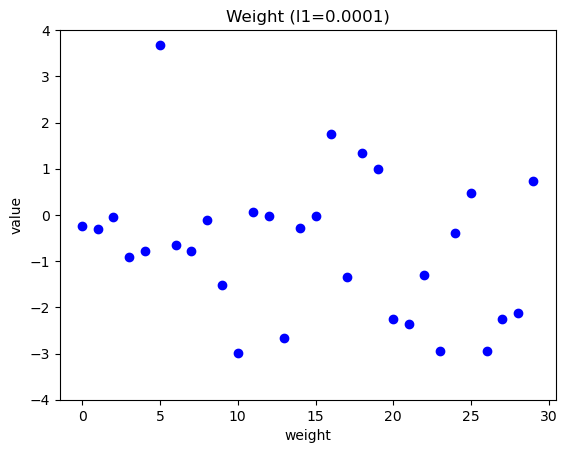

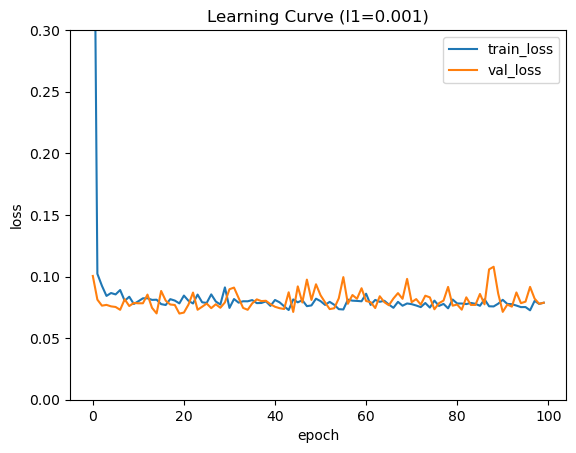

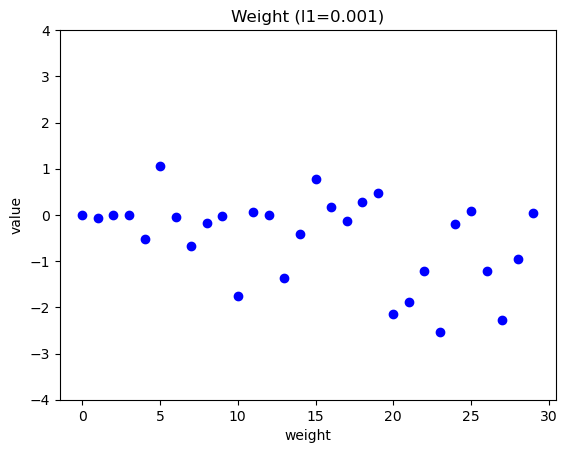

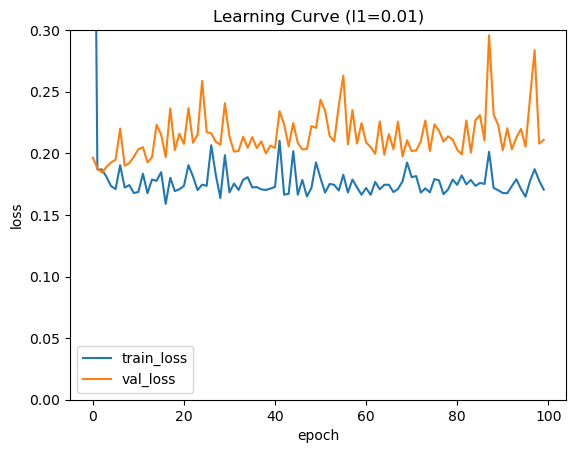

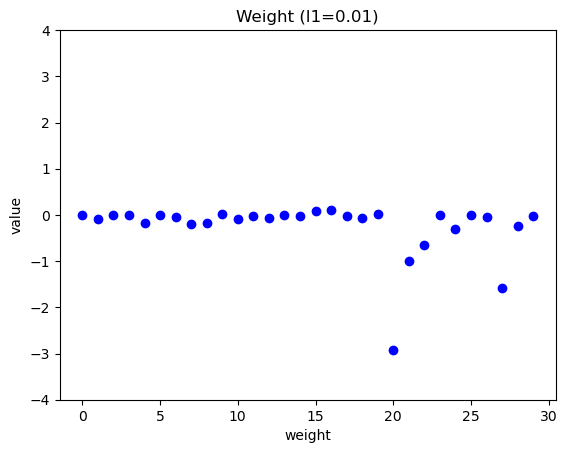

In [33]:
l1_list = [0.0001, 0.001, 0.01]

for l1 in l1_list:
    lyr = SingleLayer(l1=l1)
    lyr.fit(x_train_scaled, y_train, x_val=x_val_scaled, y_val=y_val)
    
    plt.plot(lyr.losses)
    plt.plot(lyr.val_losses)
    plt.title('Learning Curve (l1={})'.format(l1))
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train_loss', 'val_loss'])
    plt.ylim(0, 0.3)
    plt.show()
    
    plt.plot(lyr.w, 'bo')
    plt.title('Weight (l1={})'.format(l1))
    plt.ylabel('value')
    plt.xlabel('weight')
    plt.ylim(-4, 4)
    plt.show()

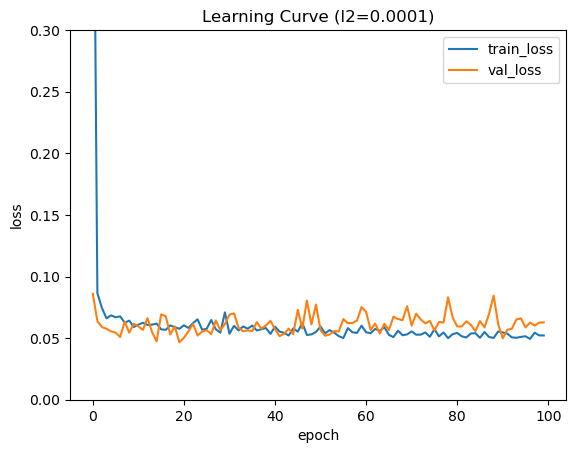

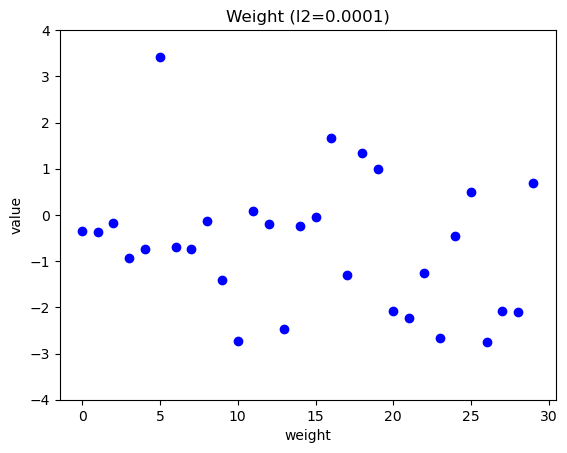

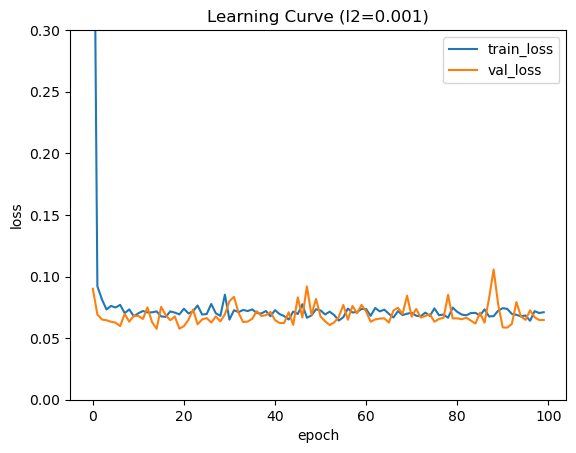

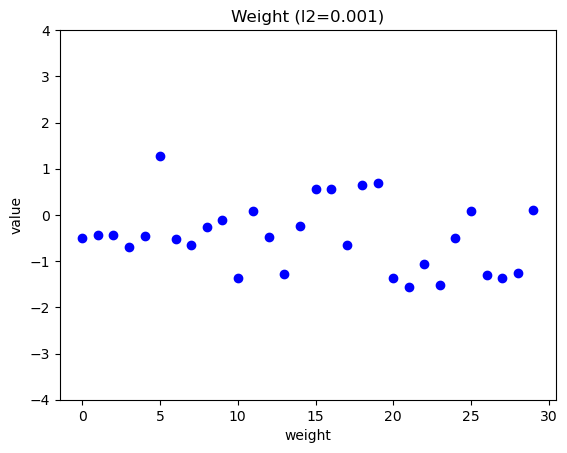

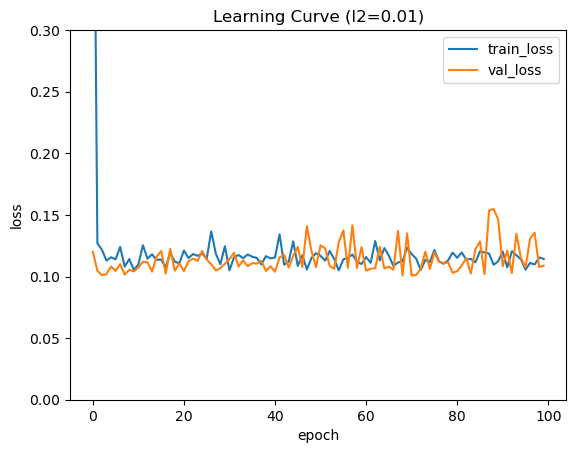

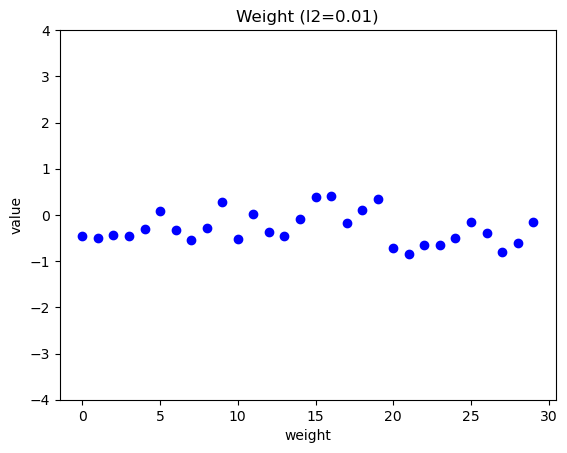

In [34]:
l2_list = [0.0001, 0.001, 0.01]

for l2 in l2_list:
    lyr = SingleLayer(l2=l2)
    lyr.fit(x_train_scaled, y_train, x_val=x_val_scaled, y_val=y_val)
    
    plt.plot(lyr.losses)
    plt.plot(lyr.val_losses)
    plt.title('Learning Curve (l2={})'.format(l2))
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train_loss', 'val_loss'])
    plt.ylim(0, 0.3)
    plt.show()
    
    plt.plot(lyr.w, 'bo')
    plt.title('Weight (l2={})'.format(l2))
    plt.ylabel('value')
    plt.xlabel('weight')
    plt.ylim(-4, 4)
    plt.show()

### K 폴드 교차 검증 구현

In [35]:
a=13
b=7
print(a//b)

1


In [36]:
print(len(x_train_all))

455


In [44]:
a = np.array([1,2,3])
b = np.array([2,3,4])
a+b

array([3, 5, 7])

In [45]:
a = [1,2,3]
b = [2,3,4]
a+b

[1, 2, 3, 2, 3, 4]

In [55]:
a = np.arange(10,31)
print(a)
index = [0,1,2,3,4,16,17,18,19,20]
a[index]

[10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30]


array([10, 11, 12, 13, 14, 26, 27, 28, 29, 30])

In [56]:
x = np.arange(100,200)
k = 10
# print(x)
bins = len(x) // k
# print(bins)
i=1
start = i*bins
end = (i+1)*bins
# print(x[start:end])
# print(list(range(0, start)))
# print(list(range(end, len(x))))
# [0:10]+[20:100]
# print(list(range(0, start))+list(range(end, len(x))))
train_index = list(range(0, start))+list(range(end, len(x)))
print(train_index)
# # print(type(x[train_index]))
print(np.array(x[train_index]))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
[100 101 102 103 104 105 106 107 108 109 120 121 122 123 124 125 126 127
 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145
 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163
 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181
 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199]


In [57]:
validation_scores = []
k = 10
print(len(x_train_all))
bins = len(x_train_all) // k
print(bins)
for i in range(k):
    start = i*bins
    end = (i+1)*bins
    print("start=%d"%start)
    print("end=%d"%end)
    val_fold = x_train_all[start:end]
    val_target = y_train_all[start:end]
    
    train_index = list(range(0, start))+list(range(end, len(x_train)))
    train_fold = x_train_all[train_index]
    train_target = y_train_all[train_index]
    
    train_mean = np.mean(train_fold, axis=0)
    train_std = np.std(train_fold, axis=0)
    train_fold_scaled = (train_fold - train_mean) / train_std
    val_fold_scaled = (val_fold - train_mean) / train_std
    
    lyr = SingleLayer(l2=0.01)
    lyr.fit(train_fold_scaled, train_target, epochs=50)
    score = lyr.score(val_fold_scaled, val_target)
    validation_scores.append(score)

print(np.mean(validation_scores))

455
45
start=0
end=45
start=45
end=90
start=90
end=135
start=135
end=180
start=180
end=225
start=225
end=270
start=270
end=315
start=315
end=360
start=360
end=405
start=405
end=450
0.9711111111111113


In [ ]:
def forpass(x, w):
    z = np.sum(x * w)
#     z = np.dot(x , w) # x와 w의 내적이 계산된다. 
    return z

x = np.array([1,2,3])
w = np.array([2,3,4])
# np.sum(x*w)
ret = forpass(x,w)
ret


In [60]:
x = np.array([1,2,3]) # (3,)
print(x.shape)
w = np.array([2,2,2]) # (3,)
print(w.shape)
np.dot(x,w)  # (3,)(3,)

(3,)
(3,)


12

In [61]:
x = np.array([[1,2,3]]) # (1,3)
print(x.shape)
w = np.array([2,2,2]) # (3,)
print(w.shape)
np.dot(x,w) #(1,3)(3,)

(1, 3)
(3,)


array([12])

In [62]:
a = np.array([[1,2,3],
              [1,2,3]]) # 2차원 배열  (2,3)
b = np.array([2,2,2])           # 1차원 배열  (3,)
np.dot(a,b)  # (2,3)(3,) =>(2,)

array([12, 12])

In [63]:
a = np.array([[1,2,3],
              [1,2,3]]) # 2차원 배열  (2,3)
b = np.array([2,2])             # 1차원 배열  (2,)
np.dot(b,a)  # (2,)(2,3) =>(3,)

array([ 4,  8, 12])

In [64]:
a = np.array([[1,2,3],
              [1,2,3]]) # 2차원 배열  (2,3)
b = np.array([[2,2],
              [2,2]])     # 2차원 배열  (2,2)
np.dot(b,a)  # (2,2)(2,3) =>(2,3)

array([[ 4,  8, 12],
       [ 4,  8, 12]])

In [65]:
a = np.array([[1,2],
              [1,2]]) # 2차원 배열  (2,3)
b = np.array([[2,2],
              [2,2]])     # 2차원 배열  (2,2)
np.dot(a,b)  # (2,2)(2,3) =>(2,3)

array([[6, 6],
       [6, 6]])

In [66]:
a = np.array([[1,2],
              [1,2]]) # 2차원 배열  (2,3)
b = np.array([[2,2],
              [2,2]])     # 2차원 배열  (2,2)
np.dot(b,a)  # (2,2)(2,3) =>(2,3)

array([[4, 8],
       [4, 8]])

In [ ]:
x = np.array([1,2,3]) # 일차원 배열은 전치가 무의미 하다.
print(x)
print(x.T)

In [ ]:
x = np.array([[1],[2],[3]]) # 이차원 배열의 전치는 행/열의 순번이 바뀐다.
print(x.shape)
print(x)
print(x.T.shape)
print(x.T)

In [ ]:
x = np.array([[1,2],[3,4]]) # 이차원 배열의 전치는 행/열의 순번이 바뀐다.
print(x.shape)
print(x)
print(x.T.shape)
print(x.T)

In [ ]:
x = np.array([[1,2],[3,4],[5,6]]) # 이차원 배열의 전치는 행/열의 순번이 바뀐다.
print(x.shape)
print(x)
print(x.T.shape)
print(x.T)